<a href="https://www.kaggle.com/code/ardaorcun/ses-leme?scriptVersionId=126662703" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import numpy as np
import librosa 
import os 
from glob import glob
import wave
import matplotlib.pyplot as plt
import IPython.display as ipd
import seaborn as sns
from plotly import express as px
import plotly 
from tqdm import tqdm
from sklearn.preprocessing import StandardScaler, OneHotEncoder 
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics 
from tensorflow.keras.callbacks import ModelCheckpoint 
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, cohen_kappa_score


In [2]:
Ravdess='/kaggle/input/ravdess-emotional-speech-audio/audio_speech_actors_01-24/'

In [3]:
ravdess_directory_list=os.listdir(Ravdess)


file_emotion=[]
file_path=[]

for dir in ravdess_directory_list:
    actor=os.listdir(Ravdess + dir)
    for file in actor:
        part=file.split('.')[0]
        part=part.split('-')
        file_emotion.append(int(part[2]))
        file_path.append(Ravdess + dir + '/' + file)
        
emotion_df=pd.DataFrame(file_emotion, columns=['Emotions'])

path_df=pd.DataFrame(file_path, columns=['Path'])
Ravdess_df=pd.concat([emotion_df,path_df],axis=1)

Ravdess_df.Emotions.replace({1:'Doğal', 2:'Sakin', 3:'Mutlu', 4:'Üzgün', 5:'Kızgın', 6:'Korkmuş', 7:'İğrenmiş', 8:'Şaşırmış'}, inplace=True)
Ravdess_df.head()

Emotions                                               Path
0  Şaşırmış  /kaggle/input/ravdess-emotional-speech-audio/a...
1     Doğal  /kaggle/input/ravdess-emotional-speech-audio/a...
2  İğrenmiş  /kaggle/input/ravdess-emotional-speech-audio/a...
3  İğrenmiş  /kaggle/input/ravdess-emotional-speech-audio/a...
4     Doğal  /kaggle/input/ravdess-emotional-speech-audio/a...

In [4]:
fig=px.histogram(Ravdess_df,x='Emotions',title='Duyguların toplam sayısı')
fig.update_layout(xaxis_title='Emotions',yaxis_title='Count',showlegend=False)
#fig.update_traces(marker_color='steelblue')
fig.show()

In [5]:
plotly.offline.plot(fig, filename='Duygutablosu.html')

'Duygutablosu.html'

First 20 values of y:[-3.0343763e-14  1.4367653e-13 -1.3346637e-13 -5.9671980e-14
  7.1055615e-14 -1.5710106e-14  1.6490527e-14 -3.1295875e-14
  8.6147621e-15 -8.8189445e-15 -2.7901152e-14 -8.0355813e-14
  2.2389585e-14  1.8469960e-15  1.8979220e-14 -4.3198379e-14
 -7.5611904e-15  4.4651820e-14 -1.8593989e-14 -6.0259035e-14]
Shape of y: (83138,)
Sample rate: 22050
The file duration is 3.7704308390022674 seconds


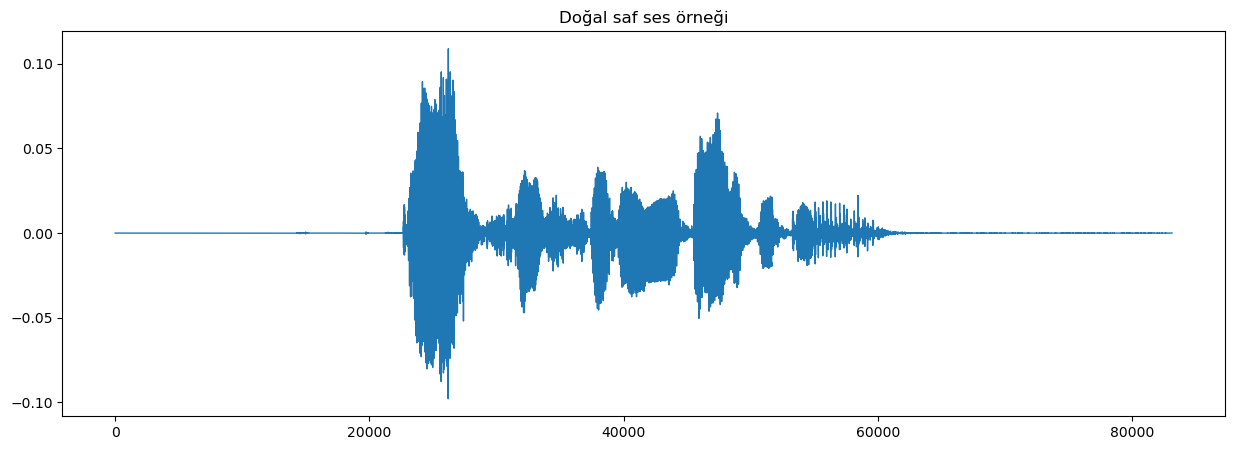

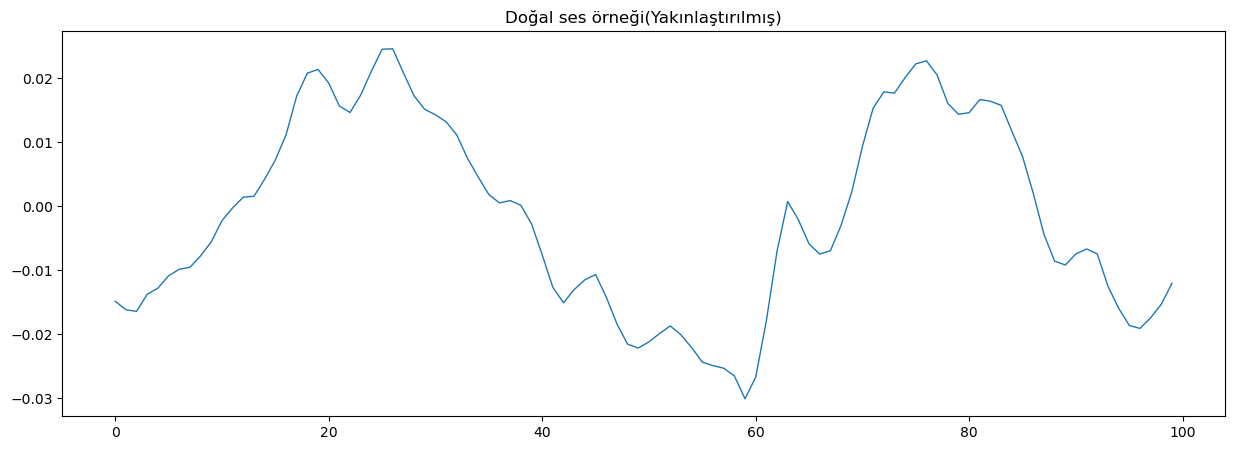

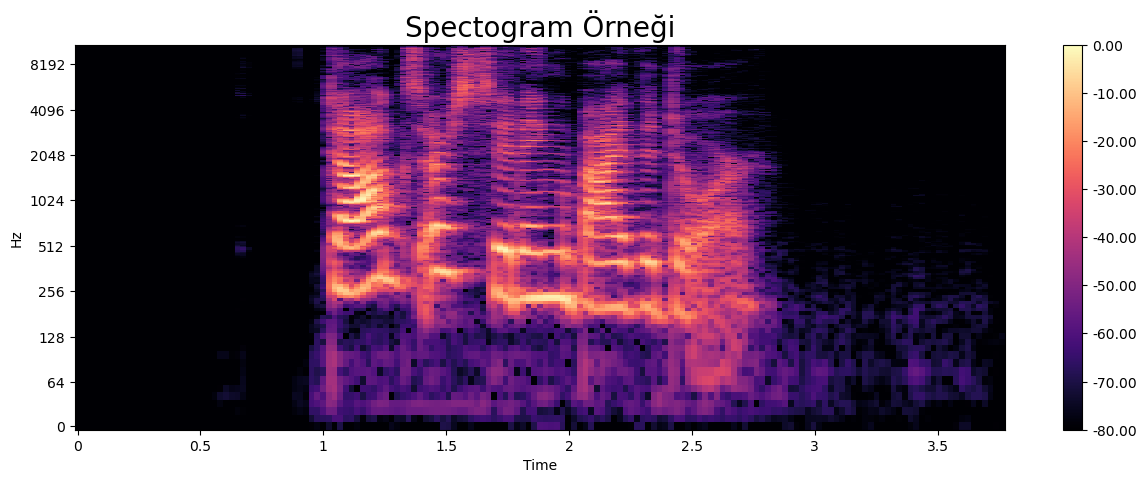

In [6]:
emotion='Doğal'
path=np.array(Ravdess_df.Path[Ravdess_df.Emotions==emotion])[1]

y, sr= librosa.load(path)
print(f'First 20 values of y:{y[:20]}') #Means almost first 20 ms
print(f'Shape of y: {y.shape}')
print(f'Sample rate: {sr}')
duration=librosa.get_duration(y=y,sr=sr)
print(f'The file duration is {duration} seconds')
pd.Series(y).plot(figsize=(15,5),lw=1,title='Doğal saf ses örneği')
plt.show()
pd.Series(y[40000:40100]).plot(figsize=(15,5), lw=1, title='Doğal ses örneği(Yakınlaştırılmış)')
plt.show()
#Spectogram and a mathematical parts.
d=librosa.stft(y) #Fourier transform here
S_db=librosa.amplitude_to_db(np.abs(d), ref=np.max) #Changing ampitude to decibel.
a,ax=plt.subplots(figsize=(15,5))
img=librosa.display.specshow(S_db,
                            x_axis='time',
                            y_axis='log',#wave form after transformation.
                            ax=ax)
ax.set_title('Spectogram Örneği', fontsize=20)
a.colorbar(img, ax=ax,format=f'%0.2f')
plt.show()
ipd.Audio(path)
#Sondaki  grafikteki her bir farklılık bir öznitelik taşır. Bunu resimlerdei pixel gibi düşünebiliriz.


First 20 values of y:[ 1.9146855e-08 -1.8727389e-08  1.7487842e-08 -1.5574397e-08
  1.2940051e-08 -9.5235482e-09  5.2823705e-09 -1.7692514e-10
 -5.8140426e-09  1.2698335e-08 -2.0464936e-08  2.9084907e-08
 -3.8505345e-08  4.8649689e-08 -5.9412983e-08  7.0659667e-08
 -8.2216502e-08  9.3870860e-08 -1.0535004e-07  1.1631333e-07]
Shape of y: (82403,)
Sample rate: 22050
The file duration is 3.737097505668934 seconds


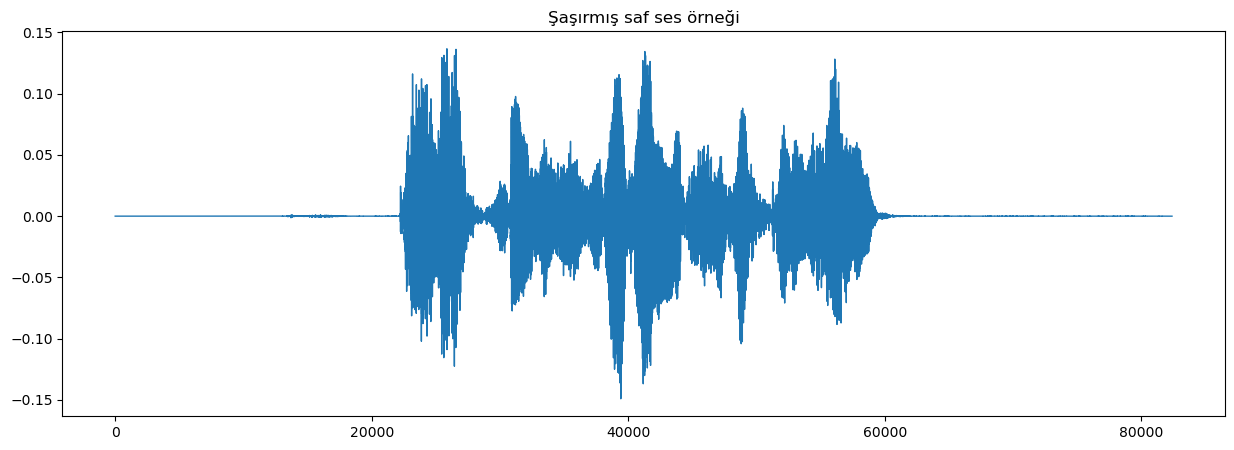

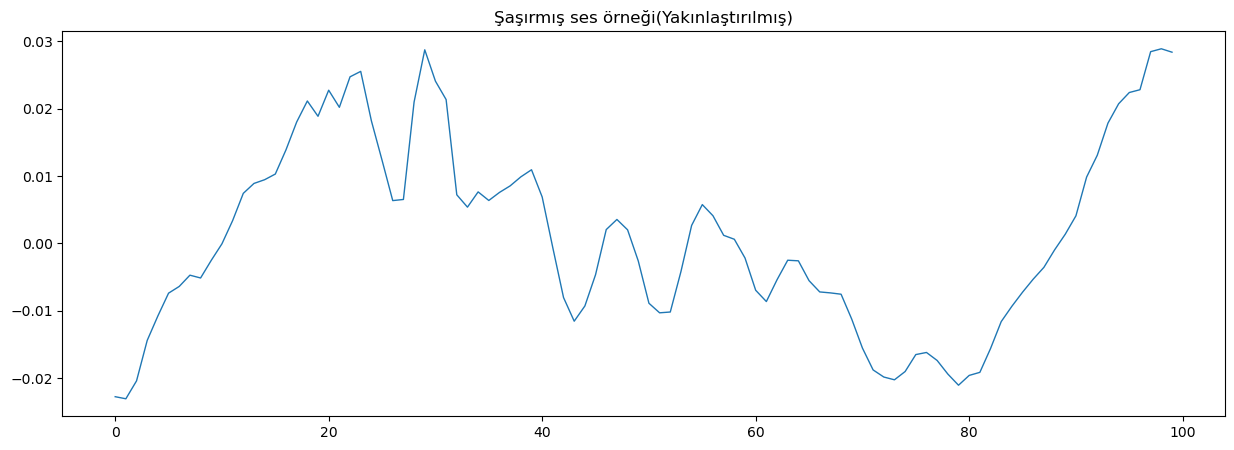

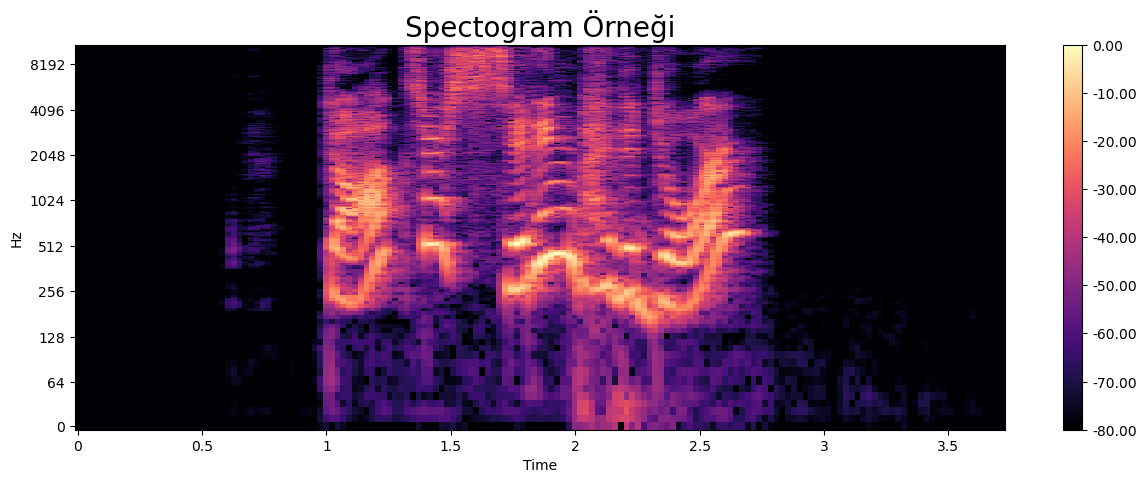

In [7]:
emotion='Şaşırmış'
path=np.array(Ravdess_df.Path[Ravdess_df.Emotions==emotion])[1]

y, sr= librosa.load(path)
print(f'First 20 values of y:{y[:20]}') #Means almost first 20 ms
print(f'Shape of y: {y.shape}')
print(f'Sample rate: {sr}')
duration=librosa.get_duration(y=y,sr=sr)
print(f'The file duration is {duration} seconds')
pd.Series(y).plot(figsize=(15,5),lw=1,title='Şaşırmış saf ses örneği')
plt.show()
pd.Series(y[40000:40100]).plot(figsize=(15,5), lw=1, title='Şaşırmış ses örneği(Yakınlaştırılmış)')
plt.show()
#Spectogram and a mathematical parts.
d=librosa.stft(y) #Fourier transform here
S_db=librosa.amplitude_to_db(np.abs(d), ref=np.max) #Changing ampitude to decibel.
a,ax=plt.subplots(figsize=(15,5))
img=librosa.display.specshow(S_db,
                            x_axis='time',
                            y_axis='log',#wave form after transformation.
                            ax=ax)
ax.set_title('Spectogram Örneği', fontsize=20)
a.colorbar(img, ax=ax,format=f'%0.2f')
plt.show()
ipd.Audio(path)
#Sondaki  grafikteki her bir farklılık bir öznitelik taşır. Bunu resimlerdei pixel gibi düşünebiliriz.


First 20 values of y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Shape of y: (80196,)
Sample rate: 22050
The file duration is 3.6370068027210882 seconds


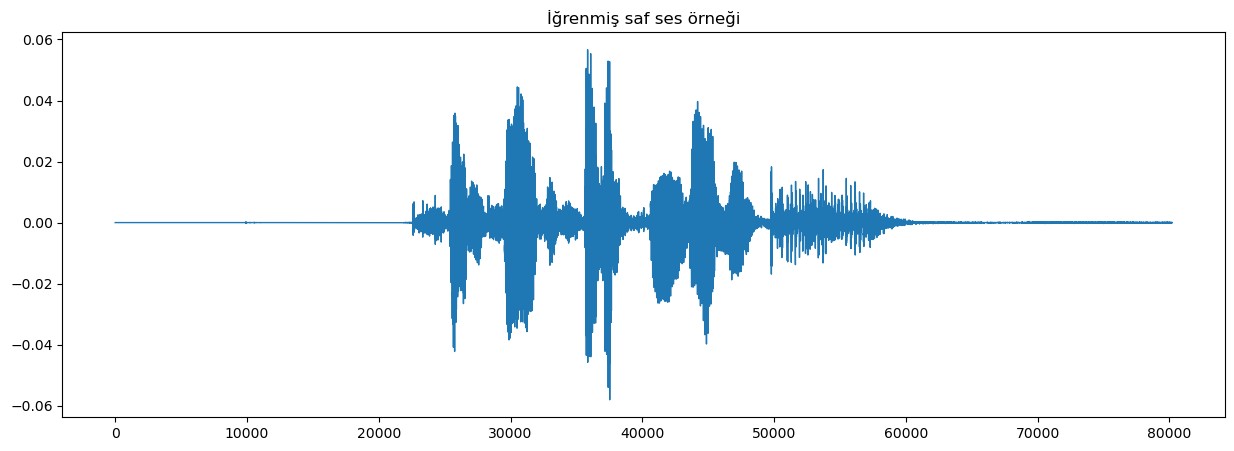

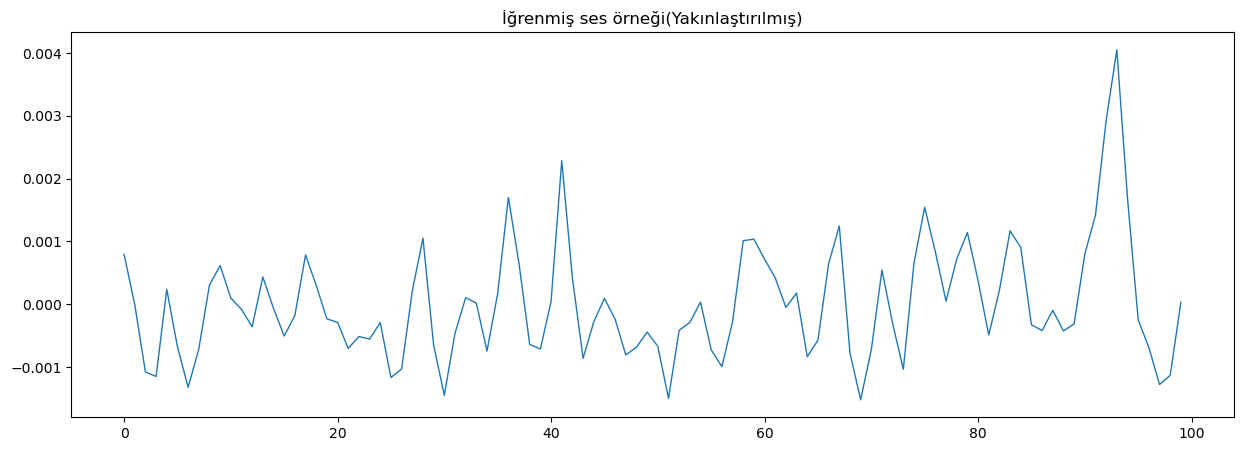

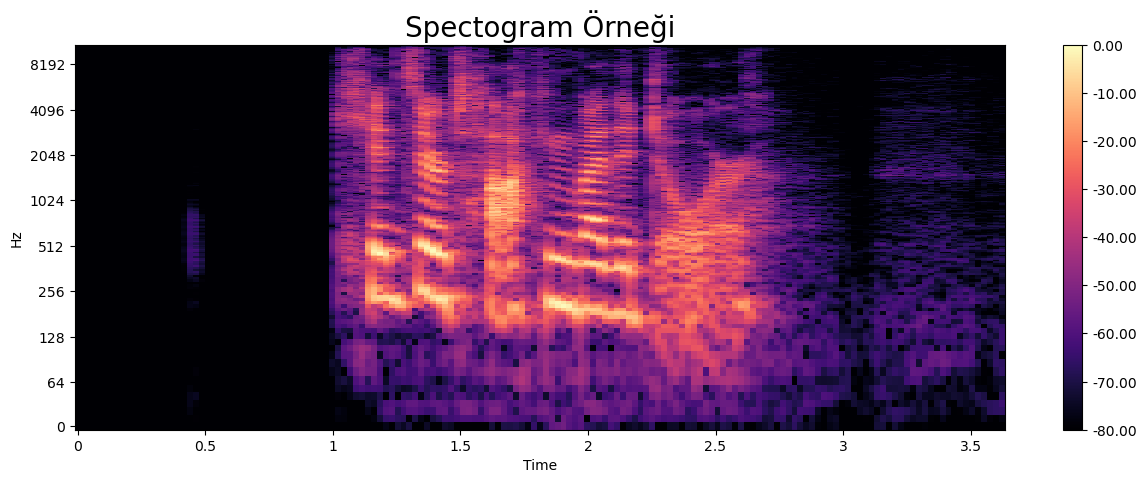

In [8]:
emotion='İğrenmiş'
path=np.array(Ravdess_df.Path[Ravdess_df.Emotions==emotion])[1]

y, sr= librosa.load(path)
print(f'First 20 values of y:{y[:20]}') #Means almost first 20 ms
print(f'Shape of y: {y.shape}')
print(f'Sample rate: {sr}')
duration=librosa.get_duration(y=y,sr=sr)
print(f'The file duration is {duration} seconds')
pd.Series(y).plot(figsize=(15,5),lw=1,title='İğrenmiş saf ses örneği')
plt.show()
pd.Series(y[40000:40100]).plot(figsize=(15,5), lw=1, title='İğrenmiş ses örneği(Yakınlaştırılmış)')
plt.show()
#Spectogram and a mathematical parts.
d=librosa.stft(y) #Fourier transform here
S_db=librosa.amplitude_to_db(np.abs(d), ref=np.max) #Changing ampitude to decibel.
a,ax=plt.subplots(figsize=(15,5))
img=librosa.display.specshow(S_db,
                            x_axis='time',
                            y_axis='log',#wave form after transformation.
                            ax=ax)
ax.set_title('Spectogram Örneği', fontsize=20)
a.colorbar(img, ax=ax,format=f'%0.2f')
plt.show()
ipd.Audio(path)
#Sondaki  grafikteki her bir farklılık bir öznitelik taşır. Bunu resimlerdei pixel gibi düşünebiliriz.


First 20 values of y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Shape of y: (80196,)
Sample rate: 22050
The file duration is 3.6370068027210882 seconds


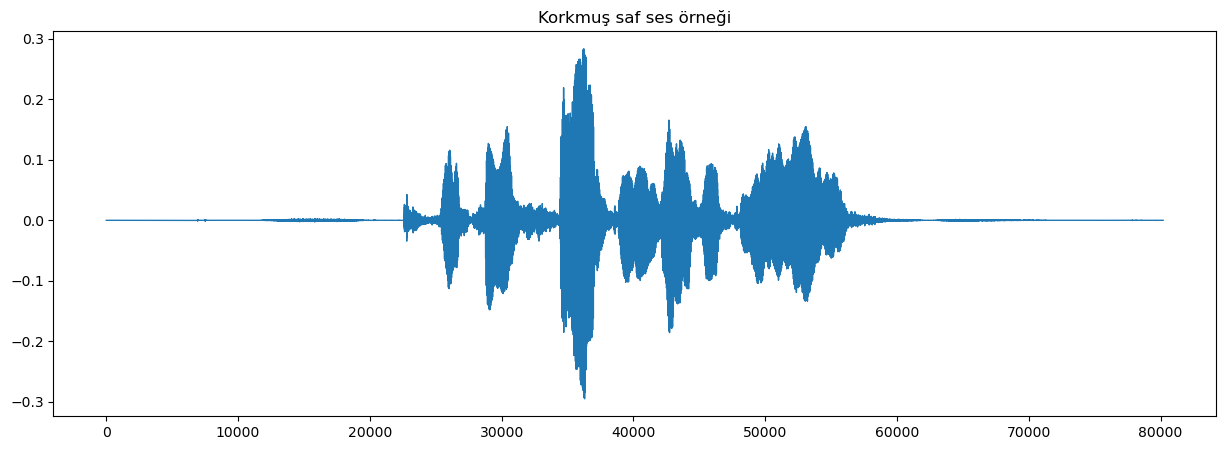

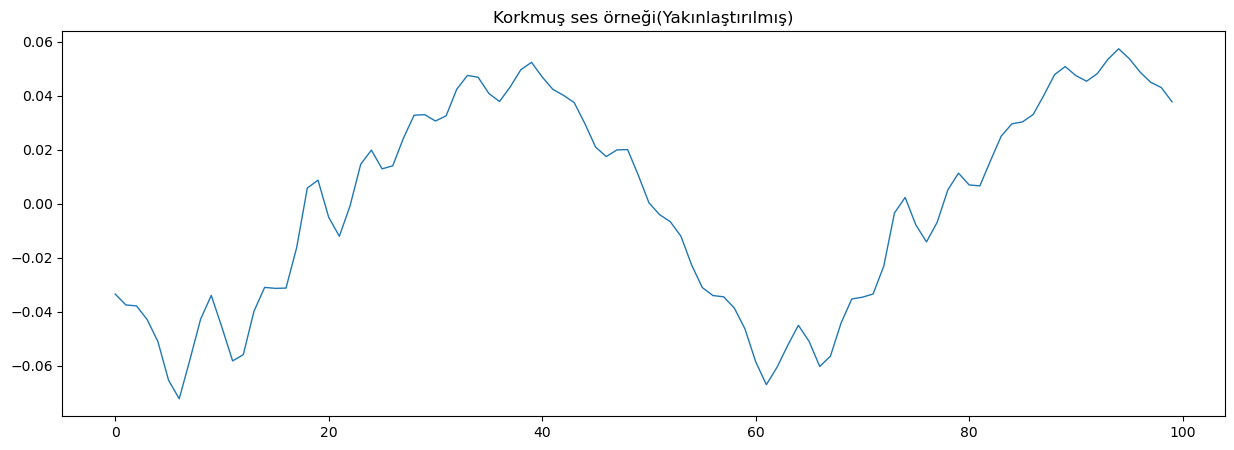

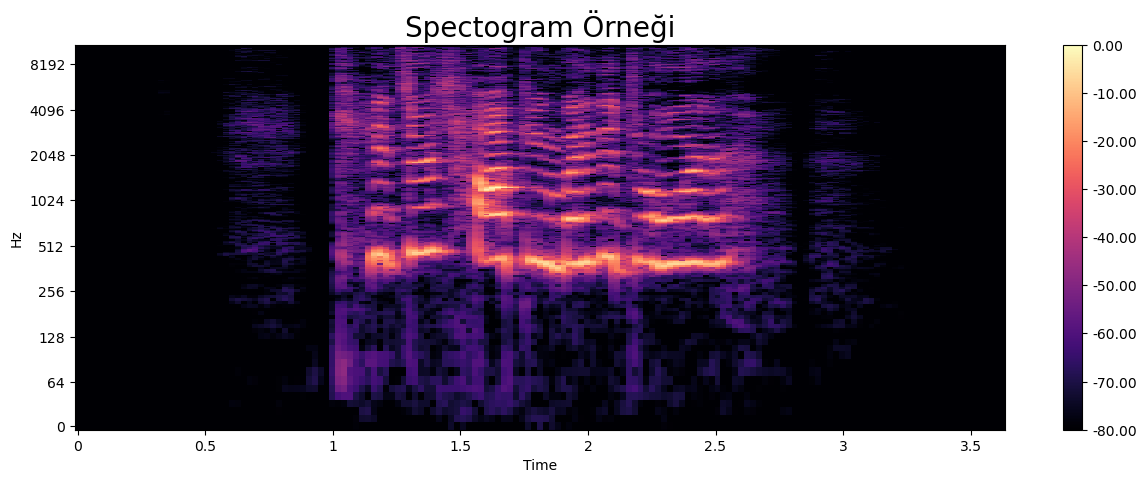

In [9]:
emotion='Korkmuş'
path=np.array(Ravdess_df.Path[Ravdess_df.Emotions==emotion])[1]

y, sr= librosa.load(path)
print(f'First 20 values of y:{y[:20]}') #Means almost first 20 ms
print(f'Shape of y: {y.shape}')
print(f'Sample rate: {sr}')
duration=librosa.get_duration(y=y,sr=sr)
print(f'The file duration is {duration} seconds')
pd.Series(y).plot(figsize=(15,5),lw=1,title='Korkmuş saf ses örneği')
plt.show()
pd.Series(y[40000:40100]).plot(figsize=(15,5), lw=1, title='Korkmuş ses örneği(Yakınlaştırılmış)')
plt.show()
#Spectogram and a mathematical parts.
d=librosa.stft(y) #Fourier transform here
S_db=librosa.amplitude_to_db(np.abs(d), ref=np.max) #Changing ampitude to decibel.
a,ax=plt.subplots(figsize=(15,5))
img=librosa.display.specshow(S_db,
                            x_axis='time',
                            y_axis='log',#wave form after transformation.
                            ax=ax)
ax.set_title('Spectogram Örneği', fontsize=20)
a.colorbar(img, ax=ax,format=f'%0.2f')
plt.show()
ipd.Audio(path)
#Sondaki  grafikteki her bir farklılık bir öznitelik taşır. Bunu resimlerdei pixel gibi düşünebiliriz.


First 20 values of y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Shape of y: (80931,)
Sample rate: 22050
The file duration is 3.670340136054422 seconds


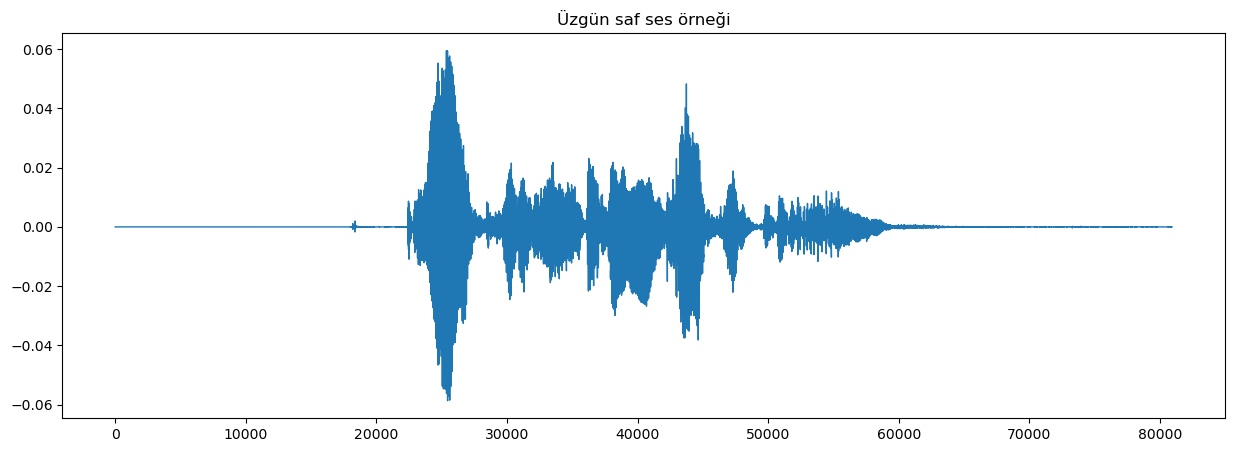

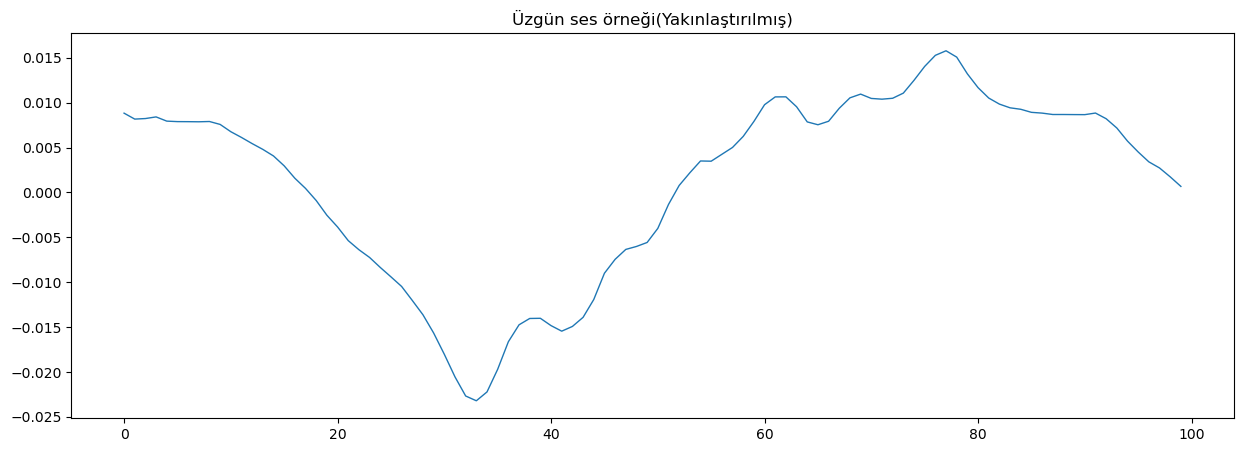

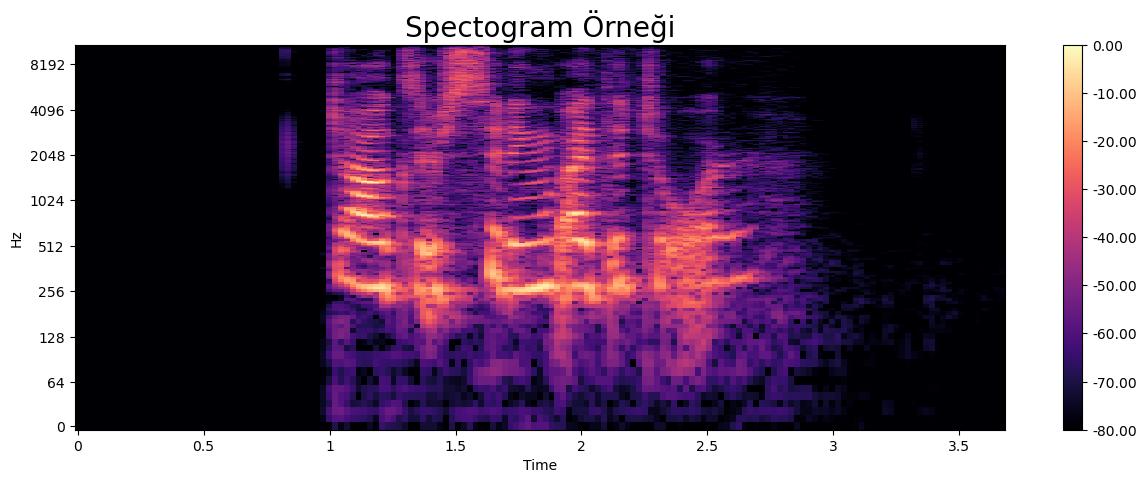

In [10]:
emotion='Üzgün'
path=np.array(Ravdess_df.Path[Ravdess_df.Emotions==emotion])[1]

y, sr= librosa.load(path)
print(f'First 20 values of y:{y[:20]}') #Means almost first 20 ms
print(f'Shape of y: {y.shape}')
print(f'Sample rate: {sr}')
duration=librosa.get_duration(y=y,sr=sr)
print(f'The file duration is {duration} seconds')
pd.Series(y).plot(figsize=(15,5),lw=1,title='Üzgün saf ses örneği')
plt.show()
pd.Series(y[40000:40100]).plot(figsize=(15,5), lw=1, title='Üzgün ses örneği(Yakınlaştırılmış)')
plt.show()
#Spectogram and a mathematical parts.
d=librosa.stft(y) #Fourier transform here
S_db=librosa.amplitude_to_db(np.abs(d), ref=np.max) #Changing ampitude to decibel.
a,ax=plt.subplots(figsize=(15,5))
img=librosa.display.specshow(S_db,
                            x_axis='time',
                            y_axis='log',#wave form after transformation.
                            ax=ax)
ax.set_title('Spectogram Örneği', fontsize=20)
a.colorbar(img, ax=ax,format=f'%0.2f')
plt.show()
ipd.Audio(path)
#Sondaki  grafikteki her bir farklılık bir öznitelik taşır. Bunu resimlerdei pixel gibi düşünebiliriz.


First 20 values of y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Shape of y: (84610,)
Sample rate: 22050
The file duration is 3.83718820861678 seconds


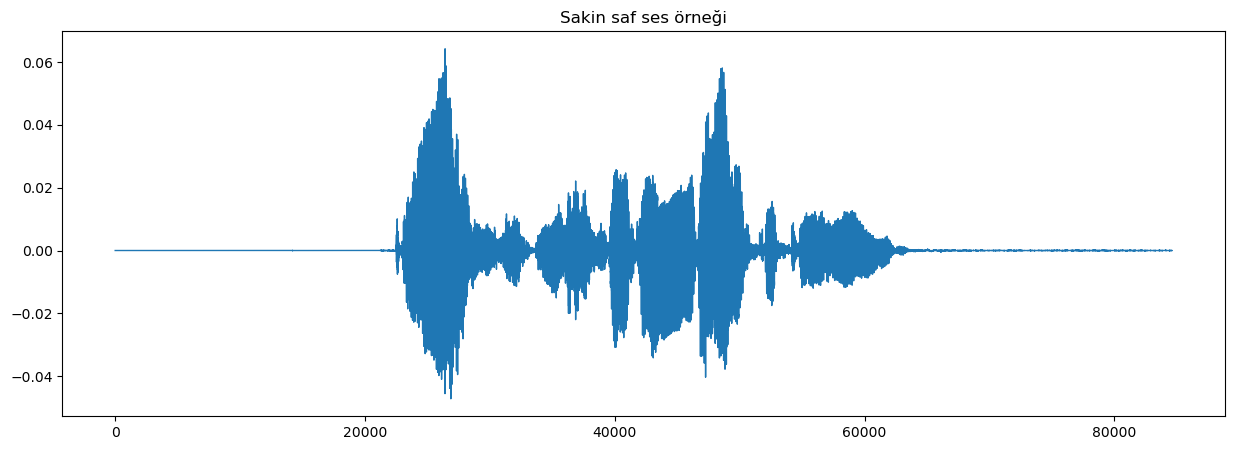

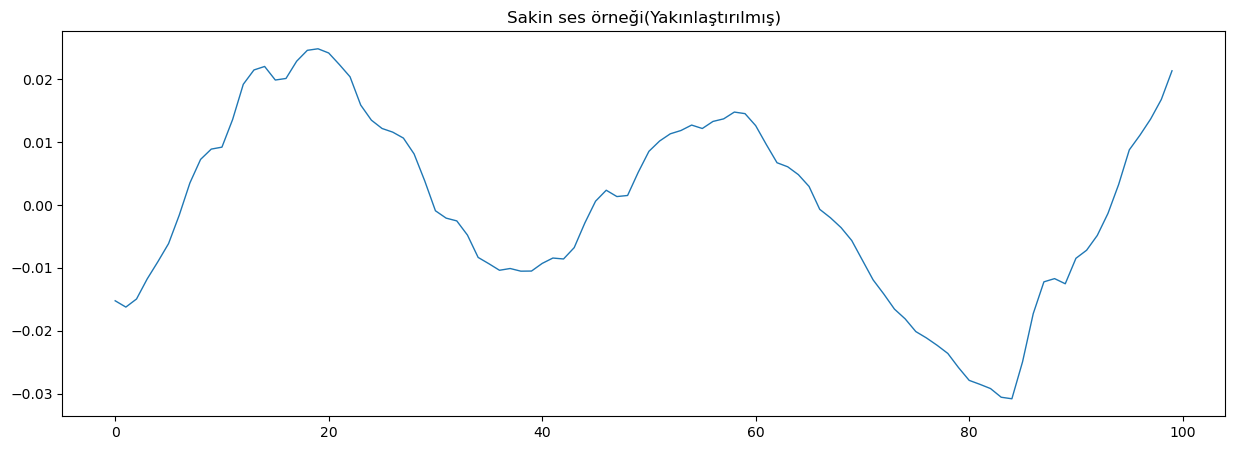

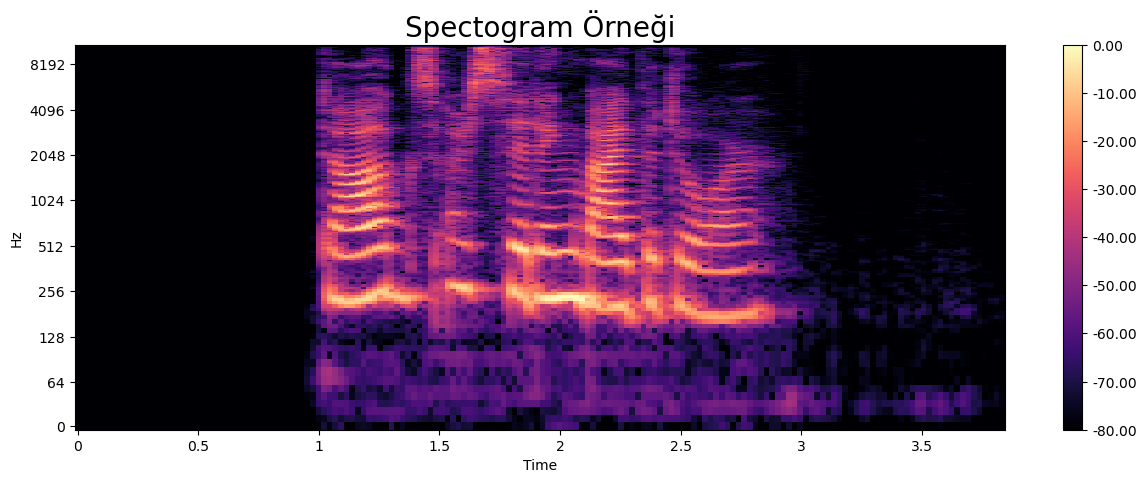

In [11]:
emotion='Sakin'
path=np.array(Ravdess_df.Path[Ravdess_df.Emotions==emotion])[1]

y, sr= librosa.load(path)
print(f'First 20 values of y:{y[:20]}') #Means almost first 20 ms
print(f'Shape of y: {y.shape}')
print(f'Sample rate: {sr}')
duration=librosa.get_duration(y=y,sr=sr)
print(f'The file duration is {duration} seconds')
pd.Series(y).plot(figsize=(15,5),lw=1,title='Sakin saf ses örneği')
plt.show()
pd.Series(y[40000:40100]).plot(figsize=(15,5), lw=1, title='Sakin ses örneği(Yakınlaştırılmış)')
plt.show()
#Spectogram and a mathematical parts.
d=librosa.stft(y) #Fourier transform here
S_db=librosa.amplitude_to_db(np.abs(d), ref=np.max) #Changing ampitude to decibel.
a,ax=plt.subplots(figsize=(15,5))
img=librosa.display.specshow(S_db,
                            x_axis='time',
                            y_axis='log',#wave form after transformation.
                            ax=ax)
ax.set_title('Spectogram Örneği', fontsize=20)
a.colorbar(img, ax=ax,format=f'%0.2f')
plt.show()
ipd.Audio(path)
#Sondaki  grafikteki her bir farklılık bir öznitelik taşır. Bunu resimlerdei pixel gibi düşünebiliriz.


First 20 values of y:[-5.5307012e-09  4.3574822e-08 -7.3015364e-08  1.0677746e-07
 -1.4303073e-07  1.8128013e-07 -2.2087661e-07  2.6104664e-07
 -3.0090538e-07  3.3945605e-07 -3.7559622e-07  4.0812571e-07
 -4.3575426e-07  4.5709749e-07 -4.7069511e-07  4.7498969e-07
 -4.6832750e-07  4.4892323e-07 -4.1480811e-07  3.6373959e-07]
Shape of y: (81667,)
Sample rate: 22050
The file duration is 3.703718820861678 seconds


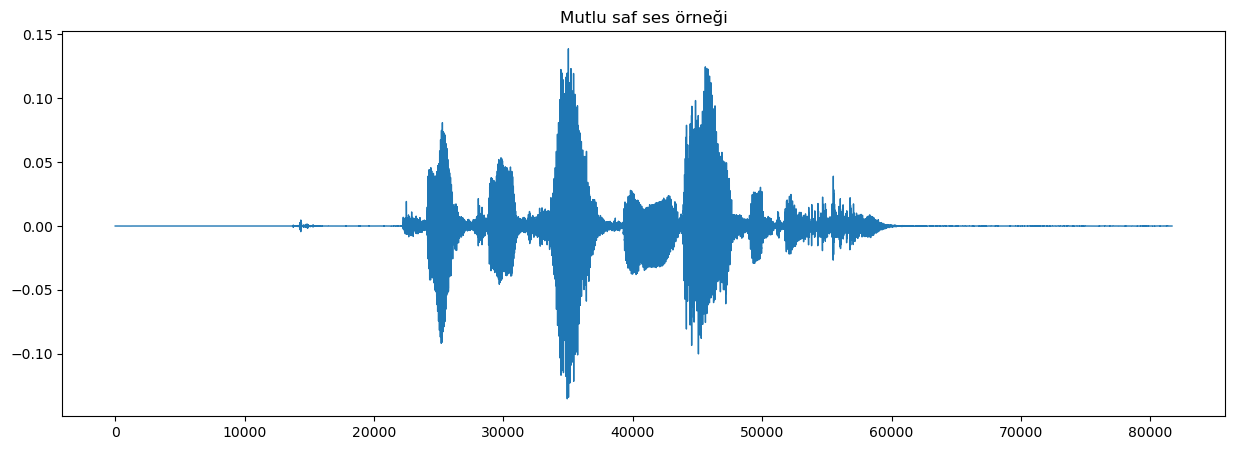

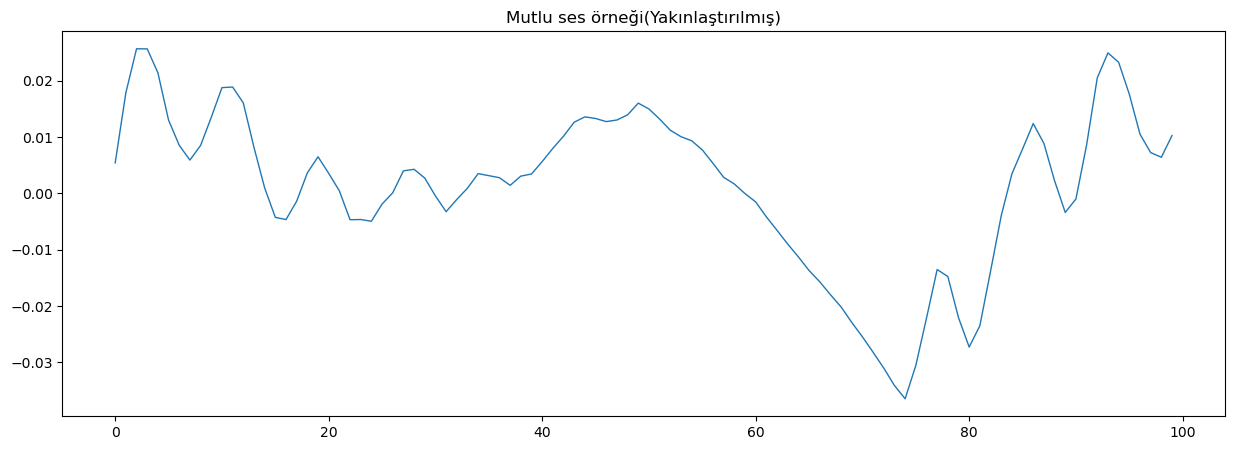

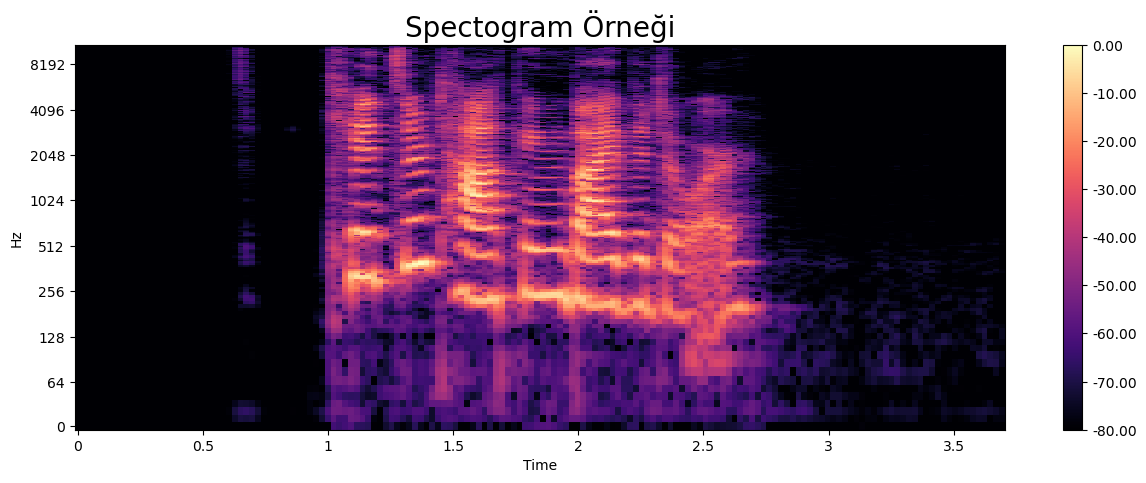

In [12]:
emotion='Mutlu'
path=np.array(Ravdess_df.Path[Ravdess_df.Emotions==emotion])[1]

y, sr= librosa.load(path)
print(f'First 20 values of y:{y[:20]}') #Means almost first 20 ms
print(f'Shape of y: {y.shape}')
print(f'Sample rate: {sr}')
duration=librosa.get_duration(y=y,sr=sr)
print(f'The file duration is {duration} seconds')
pd.Series(y).plot(figsize=(15,5),lw=1,title='Mutlu saf ses örneği')
plt.show()
pd.Series(y[40000:40100]).plot(figsize=(15,5), lw=1, title='Mutlu ses örneği(Yakınlaştırılmış)')
plt.show()
#Spectogram and a mathematical parts.
d=librosa.stft(y) #Fourier transform here
S_db=librosa.amplitude_to_db(np.abs(d), ref=np.max) #Changing ampitude to decibel.
a,ax=plt.subplots(figsize=(15,5))
img=librosa.display.specshow(S_db,
                            x_axis='time',
                            y_axis='log',#wave form after transformation.
                            ax=ax)
ax.set_title('Spectogram Örneği', fontsize=20)
a.colorbar(img, ax=ax,format=f'%0.2f')
plt.show()
ipd.Audio(path)
#Sondaki  grafikteki her bir farklılık bir öznitelik taşır. Bunu resimlerdei pixel gibi düşünebiliriz.


First 20 values of y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Shape of y: (86082,)
Sample rate: 22050
The file duration is 3.9039455782312924 seconds


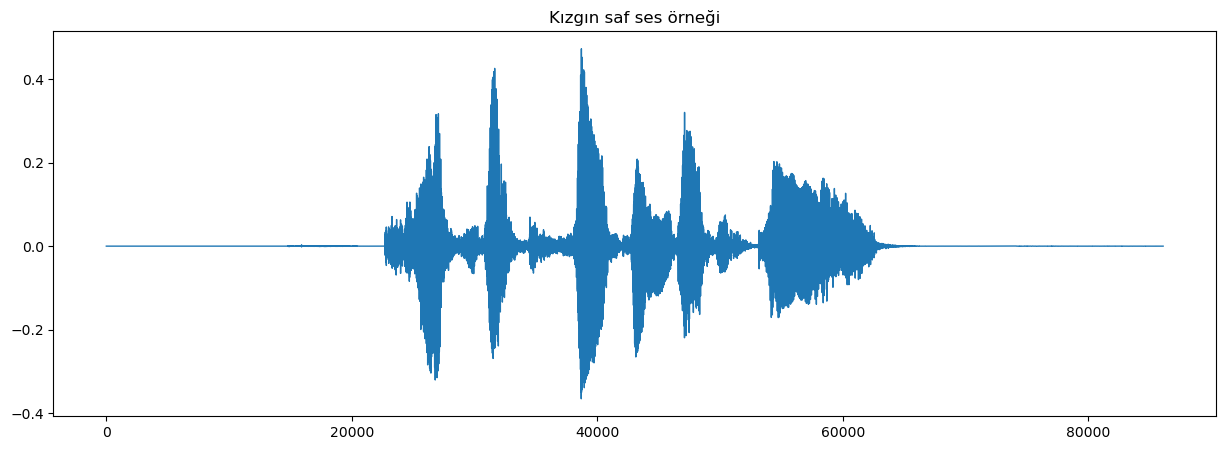

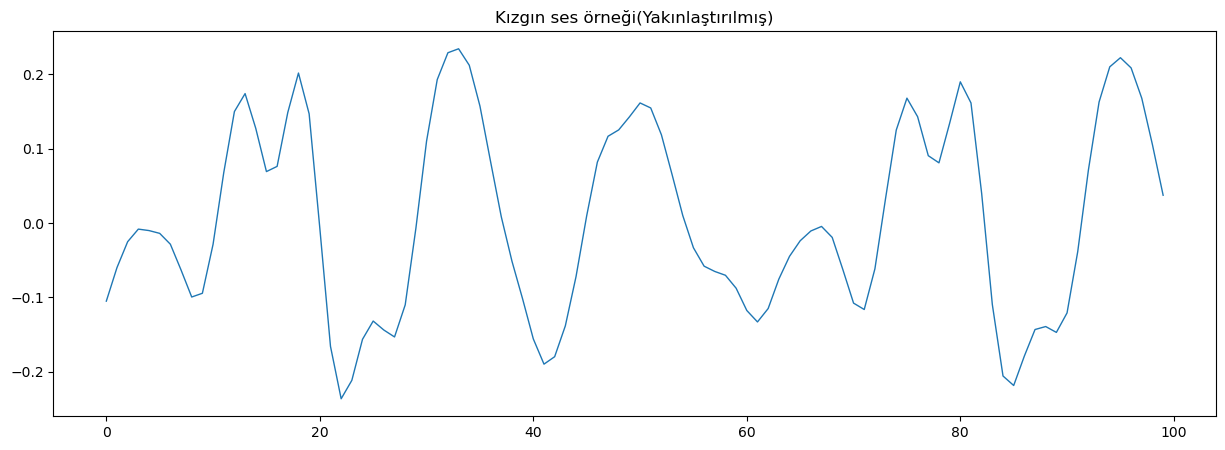

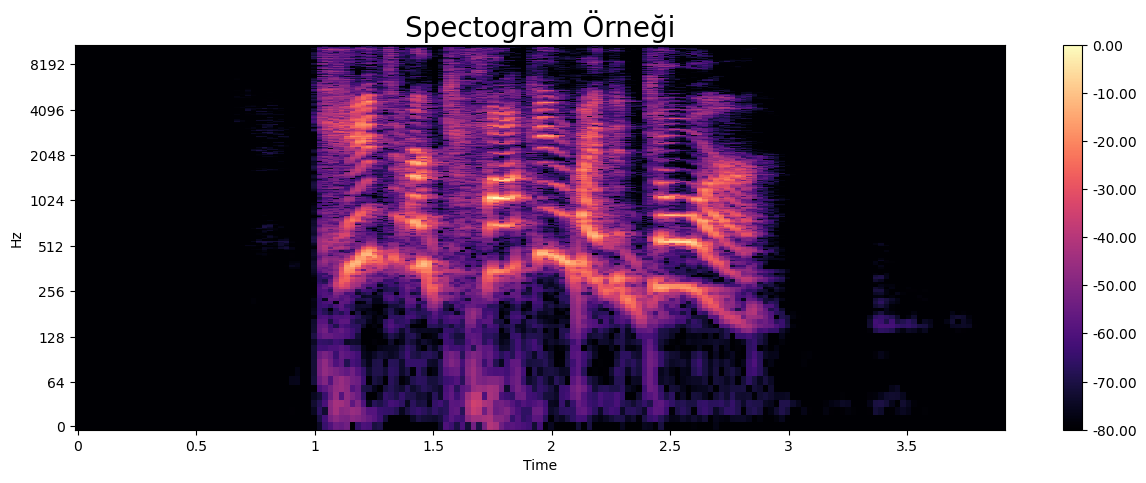

In [13]:
emotion='Kızgın'
path=np.array(Ravdess_df.Path[Ravdess_df.Emotions==emotion])[1]

y, sr= librosa.load(path)
print(f'First 20 values of y:{y[:20]}') #Means almost first 20 ms
print(f'Shape of y: {y.shape}')
print(f'Sample rate: {sr}')
duration=librosa.get_duration(y=y,sr=sr)
print(f'The file duration is {duration} seconds')
pd.Series(y).plot(figsize=(15,5),lw=1,title='Kızgın saf ses örneği')
plt.show()
pd.Series(y[40000:40100]).plot(figsize=(15,5), lw=1, title='Kızgın ses örneği(Yakınlaştırılmış)')
plt.show()
#Spectogram and a mathematical parts.
d=librosa.stft(y) #Fourier transform here
S_db=librosa.amplitude_to_db(np.abs(d), ref=np.max) #Changing ampitude to decibel.
a,ax=plt.subplots(figsize=(15,5))
img=librosa.display.specshow(S_db,
                            x_axis='time',
                            y_axis='log',#wave form after transformation.
                            ax=ax)
ax.set_title('Spectogram Örneği', fontsize=20)
a.colorbar(img, ax=ax,format=f'%0.2f')
plt.show()
ipd.Audio(path)
#Sondaki  grafikteki her bir farklılık bir öznitelik taşır. Bunu resimlerdei pixel gibi düşünebiliriz.


# Adding More Data
Now, we are going to manipulate our data to generate more samples in order to avoid overfitting. I have borrowed the code from Shivam Burnwal's work on this dataset.
For those who want to check it out:
[https://www.kaggle.com/code/shivamburnwal/speech-emotion-recognition](http://)

In [14]:
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data
def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(data, rate=rate)
def shift(data):
    shift_range=int(np.random.uniform(low=5,high=5)*1000)
    return np.roll(data, shift_range)
def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(data, sr=sampling_rate, n_steps=pitch_factor)

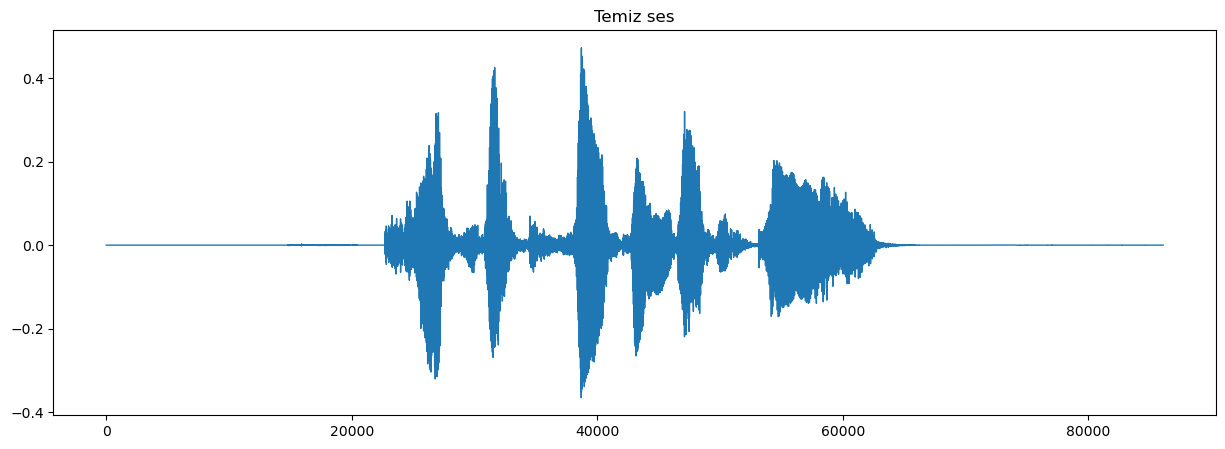

In [15]:
pd.Series(y).plot(figsize=(15,5),lw=1, title='Temiz ses')
ipd.Audio(path)

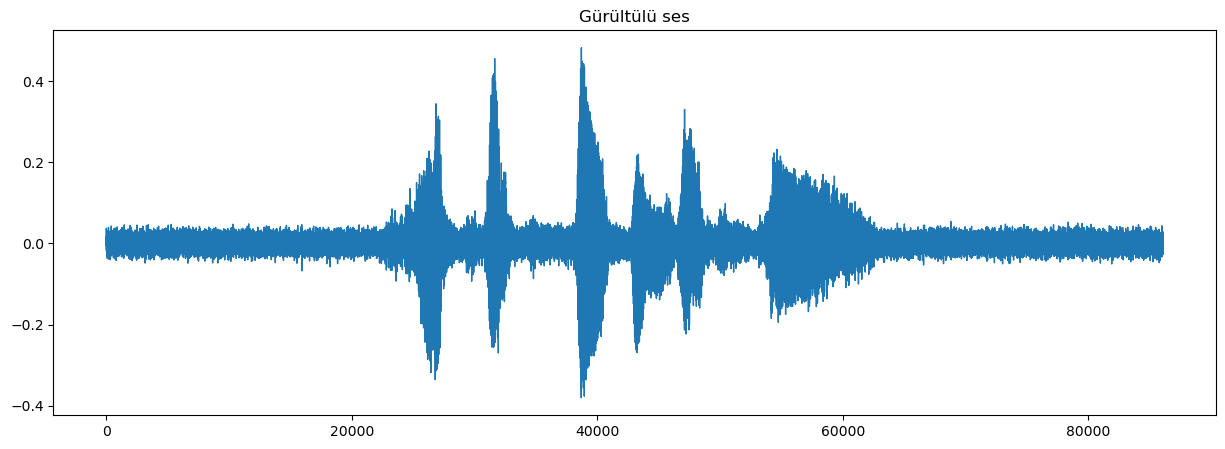

In [16]:
#Lets use our funcitons.
x=noise(y)
pd.Series(x).plot(figsize=(15,5),lw=1,title='Gürültülü ses')
ipd.Audio(x, rate=sr)

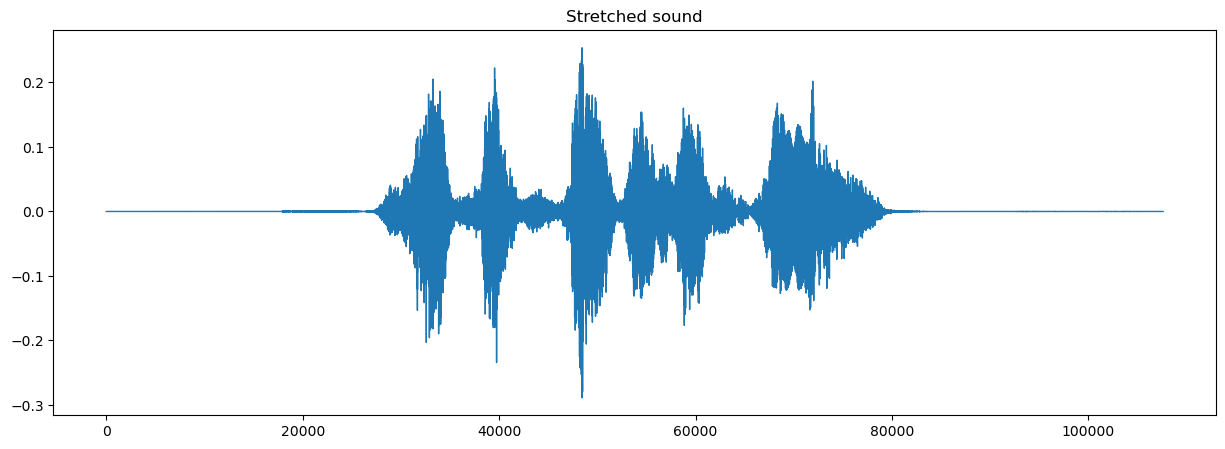

In [17]:
x=stretch(y)
pd.Series(x).plot(figsize=(15,5),lw=1, title='Stretched sound')
ipd.Audio(x, rate=sr)

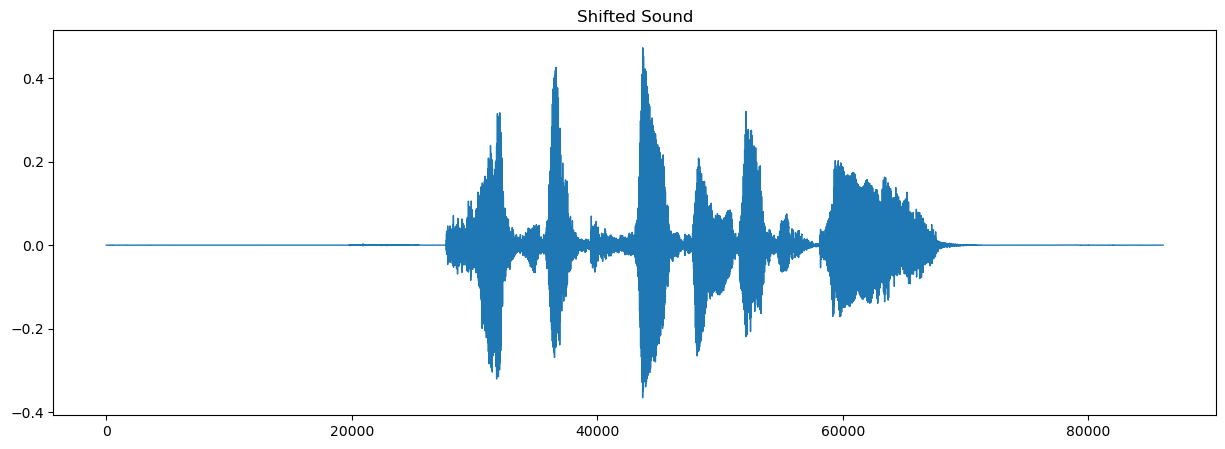

In [18]:
x=shift(y)
pd.Series(x).plot(figsize=(15,5),lw=1, title='Shifted Sound')
ipd.Audio(x,rate=sr)

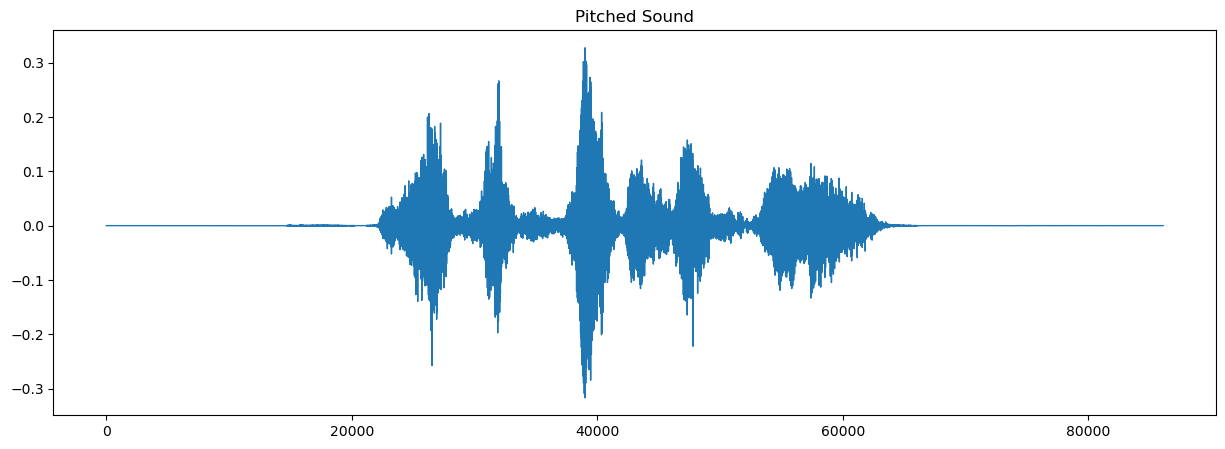

In [19]:
x=pitch(y,sr)
pd.Series(x).plot(figsize=(15,5),lw=1,title='Pitched Sound')
ipd.Audio(x,rate=sr)

In [20]:
def feature_extractors(data):
    result=np.array([])
    zcr=np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)
    result=np.hstack((result,zcr))
    
    stft = np.abs(librosa.stft(data))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sr).T, axis=0)
    result = np.hstack((result, chroma_stft))
    
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sr).T, axis=0)
    result = np.hstack((result, mfcc))
    
    rms = np.mean(librosa.feature.rms(y=data).T, axis=0)
    result = np.hstack((result, rms))
    
    mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sr).T, axis=0)
    result = np.hstack((result, mel)) 
    
    return result

def get_features (path):
    y, sr =librosa.load(path, duration=2.5, offset=0.6)
    res1=feature_extractors(y)
    result=np.array(res1)
    
    noise_data=noise(y)
    res2=feature_extractors(noise_data)
    result=np.vstack((result,res2))
    
    new_data=stretch(y)
    data_stretch_pitch=pitch(new_data, sr)
    res3=feature_extractors(data_stretch_pitch)
    result=np.vstack((result,res3))
    
    
    return result
    


In [21]:
X, Y = [],[]
for path, emotion in tqdm(zip(Ravdess_df.Path,Ravdess_df.Emotions)):
    feature=get_features(path)
    for ele in feature:
        X.append(ele)
        Y.append(emotion)

1440it [09:55,  2.42it/s]


In [22]:
Features=pd.DataFrame(X)
Features['Labels']=Y
Features.to_csv('features.csv',index=False)
Features.tail()

0         1         2         3         4         5         6  \
4315  0.237210  0.575187  0.646285  0.675535  0.743390  0.711744  0.638320   
4316  0.209057  0.543219  0.543650  0.616389  0.620212  0.661719  0.627830   
4317  0.148537  0.656566  0.652982  0.634403  0.652929  0.608521  0.557056   
4318  0.222435  0.688400  0.685149  0.698522  0.713453  0.689874  0.598040   
4319  0.173011  0.612217  0.651000  0.640020  0.634985  0.616633  0.588191   

             7         8         9  ...       153       154       155  \
4315  0.619296  0.635104  0.711587  ...  0.001975  0.001895  0.002288   
4316  0.593303  0.601911  0.625616  ...  0.000419  0.000513  0.000388   
4317  0.550457  0.628574  0.665743  ...  0.014213  0.015852  0.012141   
4318  0.562427  0.644438  0.672138  ...  0.015469  0.017394  0.013927   
4319  0.537216  0.543148  0.630741  ...  0.003108  0.003310  0.003017   

           156       157       158       159       160       161    Labels  
4315  0.003133  0.003156  0.002686  0.002445  0.001228  0.000115  İğrenmiş  
4316  0.000415  0.000393  0.000604  0.000472  0.000435  0.000034  İğrenmiş  
4317  0.011468  0.008031  0.010061  0.015541  0.008099  0.000535    Kızgın  
4318  0.013286  0.009807  0.011769  0.017124  0.010081  0.002331    Kızgın  
4319  0.002794  0.002724  0.001945  0.001886  0.001045  0.000149    Kızgın  

[5 rows x 163 columns]

In [23]:
X=Features.iloc[ : , : -1].values
Y=Features['Labels'].values


In [24]:
encoder= OneHotEncoder()
Y=encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()

In [25]:
x_train, x_test, y_train, y_test=train_test_split(X, Y, random_state=0, shuffle=True)
x_train.shape, y_train.shape, y_test.shape, x_test.shape

((3240, 162), (3240, 8), (1080, 8), (1080, 162))

In [26]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)
x_train.shape, y_train.shape, x_test.shape,  y_test.shape

((3240, 162), (3240, 8), (1080, 162), (1080, 8))

In [27]:
y_test.shape

(1080, 8)

In [28]:
x_train.shape[1]

162

In [29]:
num_labels = 8

In [30]:
model=Sequential()

In [31]:
model.add(Dense(125, input_shape=(x_train.shape[1],)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(250))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(125))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 125)               20375     
                                                                 
 activation (Activation)     (None, 125)               0         
                                                                 
 dropout (Dropout)           (None, 125)               0         
                                                                 
 dense_1 (Dense)             (None, 250)               31500     
                                                                 
 activation_1 (Activation)   (None, 250)               0         
                                                                 
 dropout_1 (Dropout)         (None, 250)               0         
                                                                 
 dense_2 (Dense)             (None, 125)               3

In [33]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [34]:
epoch=500
num_batch_size=32

In [35]:
model1=model.fit(x_train, y_train, batch_size=num_batch_size, epochs=epoch, validation_data=(x_test,y_test), verbose=1)

Epoch 1/500
102/102 [==============================] - 2s 6ms/step - loss: 2.1324 - accuracy: 0.1799 - val_loss: 1.9281 - val_accuracy: 0.2917
Epoch 2/500
102/102 [==============================] - 0s 4ms/step - loss: 1.9338 - accuracy: 0.2515 - val_loss: 1.8051 - val_accuracy: 0.3148
Epoch 3/500
102/102 [==============================] - 0s 3ms/step - loss: 1.8252 - accuracy: 0.3022 - val_loss: 1.6794 - val_accuracy: 0.3750
Epoch 4/500
102/102 [==============================] - 0s 3ms/step - loss: 1.7547 - accuracy: 0.3309 - val_loss: 1.6226 - val_accuracy: 0.3713
Epoch 5/500
102/102 [==============================] - 0s 3ms/step - loss: 1.6895 - accuracy: 0.3586 - val_loss: 1.5497 - val_accuracy: 0.4315
Epoch 6/500
102/102 [==============================] - 0s 4ms/step - loss: 1.6186 - accuracy: 0.3787 - val_loss: 1.5122 - val_accuracy: 0.4435
Epoch 7/500
102/102 [==============================] - 0s 4ms/step - loss: 1.5989 - accuracy: 0.4015 - val_loss: 1.4691 - val_accuracy: 0.4556

In [36]:
val_test_acc=model.evaluate(x_test,y_test, verbose=0)
print(val_test_acc[1])

0.7722222208976746


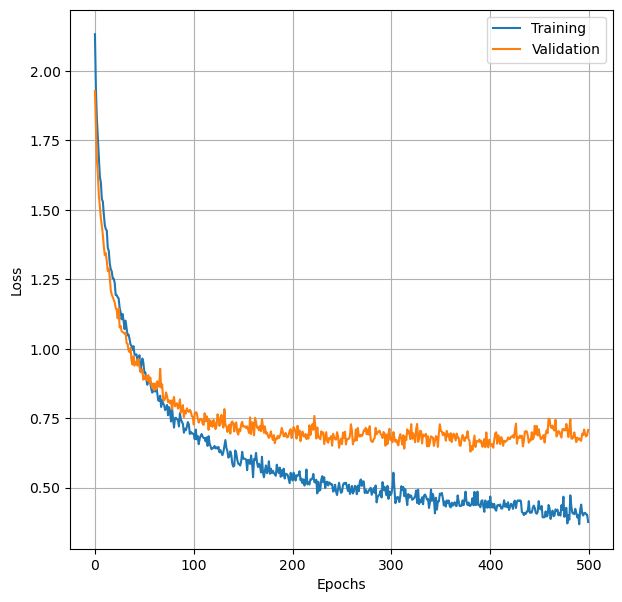

In [37]:
plt.figure(figsize=(7,7)) 
plt.grid() 
plt.plot(model1.history['loss'])
plt.plot(model1.history['val_loss'])
plt.ylabel('Loss') 
plt.xlabel('Epochs')
plt.legend(['Training','Validation'], loc='upper right') 
plt.savefig("loss_curve.pdf") 
plt.show()


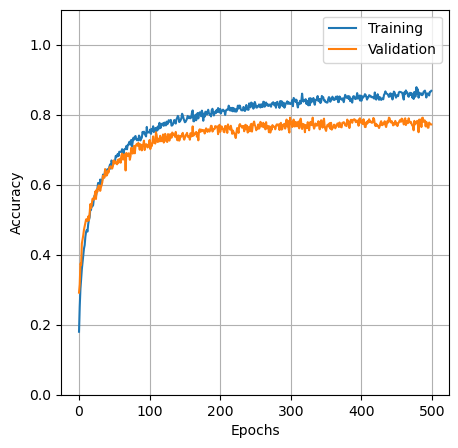

In [38]:
plt.figure(figsize=(5,5)) 
plt.ylim(0,1.1) 
plt.grid() 
plt.plot(model1.history['accuracy'])
plt.plot(model1.history['val_accuracy'])
plt.ylabel('Accuracy') 
plt.xlabel('Epochs') 
plt.legend(['Training','Validation']) 
plt.savefig("acc_curve.pdf") 
plt.show()

In [39]:
result_array=model.predict(x_test)

34/34 [==============================] - 0s 1ms/step


In [40]:
result_classes = ['Doğal','Sakin','Mutlu','Üzgün','Kızgın','Korkmuş','İğrenmiş','Şaşırmış']

result=np.argmax(result_array[13])
print(result_classes[result])

Korkmuş


In [41]:
Y_pred_test=model.predict(x_test)
Y_pred_test=np.argmax(Y_pred_test,axis=1)
classification= classification_report(np.argmax(y_test,axis=1),Y_pred_test)
print(classification)

34/34 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.64      0.53      0.58        83
           1       0.79      0.83      0.81       161
           2       0.83      0.82      0.82       141
           3       0.81      0.73      0.77       148
           4       0.80      0.86      0.83       129
           5       0.77      0.67      0.71       142
           6       0.73      0.85      0.79       145
           7       0.76      0.80      0.78       131

    accuracy                           0.77      1080
   macro avg       0.76      0.76      0.76      1080
weighted avg       0.77      0.77      0.77      1080



In [42]:
pred_test = model.predict(x_test)
y_pred = encoder.inverse_transform(pred_test)

y_test = encoder.inverse_transform(y_test)

34/34 [==============================] - 0s 1ms/step


In [43]:
df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_pred.flatten()
df['Actual Labels'] = y_test.flatten()

df.head(20)

Predicted Labels Actual Labels
0           Korkmuş       Korkmuş
1             Üzgün         Doğal
2          İğrenmiş         Üzgün
3             Doğal         Doğal
4           Korkmuş       Korkmuş
5            Kızgın        Kızgın
6           Korkmuş       Korkmuş
7           Korkmuş       Korkmuş
8          İğrenmiş      İğrenmiş
9             Sakin         Sakin
10           Kızgın        Kızgın
11         İğrenmiş         Doğal
12            Mutlu         Mutlu
13            Üzgün       Korkmuş
14            Üzgün        Kızgın
15         İğrenmiş      İğrenmiş
16         Şaşırmış         Doğal
17          Korkmuş       Korkmuş
18            Mutlu         Mutlu
19         İğrenmiş      İğrenmiş

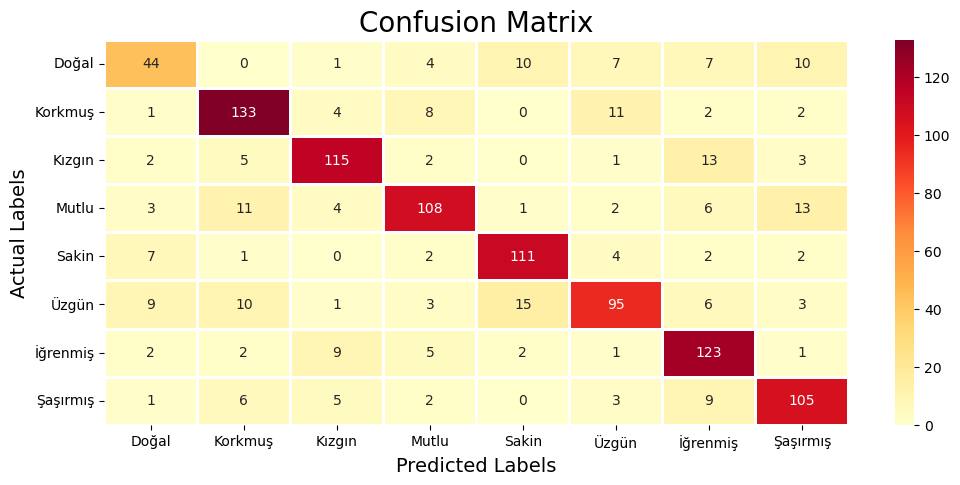

In [44]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (12, 5))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='YlOrRd', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

In [45]:
model.save('emotionmodel.hdf5')